IMPORT THE LIBRARIES

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt





GET THE STOCK DATA

In [ ]:
from google.colab import files
files.upload()

Saving TATAMOTORS.csv to TATAMOTORS.csv


{'TATAMOTORS.csv': b'Date,Open,High,Low,CLOSE,Adj Close,Volume\r\n2/21/2018,372.5,372.5,362.850006,364.450012,364.450012,8640166\r\n2/22/2018,363,363,357.5,358.5,358.5,10870704\r\n2/23/2018,360.100006,364.600006,358.75,360.200012,360.200012,6751064\r\n2/26/2018,362,373.5,362,372.049988,372.049988,10576794\r\n2/27/2018,375,376.600006,370.350006,372.549988,372.549988,6156672\r\n2/28/2018,370,373.649994,367.149994,369.899994,369.899994,8009429\r\n3/1/2018,369.75,376.299988,369.049988,370.75,370.75,6991806\r\n3/5/2018,368.75,368.75,350.100006,352.049988,352.049988,14665325\r\n3/6/2018,355.149994,357.950012,345,346.5,346.5,8876632\r\n3/7/2018,345,355.299988,343.25,347.799988,347.799988,15599393\r\n3/8/2018,350.799988,351.899994,341.049988,345.149994,345.149994,7674221\r\n3/9/2018,345.549988,348.700012,340.149994,341.5,341.5,5519224\r\n3/12/2018,345,353.799988,340.350006,352.600006,352.600006,8238960\r\n3/13/2018,352.600006,356.450012,350,353.149994,353.149994,6184241\r\n3/14/2018,351,354.89

TO SHOW THE DATA

In [ ]:
df=pd.read_csv('TATAMOTORS.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,CLOSE,Adj Close,Volume
2018-02-21,2/21/2018,372.500000,372.500000,362.850006,364.450012,364.450012,8640166
2018-02-22,2/22/2018,363.000000,363.000000,357.500000,358.500000,358.500000,10870704
2018-02-23,2/23/2018,360.100006,364.600006,358.750000,360.200012,360.200012,6751064
2018-02-26,2/26/2018,362.000000,373.500000,362.000000,372.049988,372.049988,10576794
2018-02-27,2/27/2018,375.000000,376.600006,370.350006,372.549988,372.549988,6156672
...,...,...,...,...,...,...,...
2023-02-14,2/14/2023,442.000000,444.299988,434.399994,440.549988,440.549988,8565559
2023-02-15,2/15/2023,438.500000,444.899994,438.149994,444.149994,444.149994,9857016
2023-02-16,2/16/2023,445.000000,448.250000,440.500000,441.600006,441.600006,7670688
2023-02-17,2/17/2023,436.000000,442.450012,436.000000,439.899994,439.899994,6955445


In [ ]:
df.head()

,Date,Open,High,Low,CLOSE,Adj Close,Volume
2018-02-21,2/21/2018,372.500000,372.500000,362.850006,364.450012,364.450012,8640166
2018-02-22,2/22/2018,363.000000,363.000000,357.500000,358.500000,358.500000,10870704
2018-02-23,2/23/2018,360.100006,364.600006,358.750000,360.200012,360.200012,6751064
2018-02-26,2/26/2018,362.000000,373.500000,362.000000,372.049988,372.049988,10576794
2018-02-27,2/27/2018,375.000000,376.600006,370.350006,372.549988,372.549988,6156672


TO GET NUMBER OF ROWS AND COLUMNS


In [ ]:
df.describe()

,Open,High,Low,CLOSE,Adj Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,274.077548,278.346602,269.192881,273.448220,273.448220,3.730870e+07
std,128.625660,129.861831,127.009539,128.345853,128.345853,3.684463e+07
min,66.500000,66.900002,63.500000,65.300003,65.300003,2.871205e+06
25%,166.887497,170.137497,163.550003,166.924999,166.924999,1.434655e+07
50%,269.350006,271.925003,262.425003,267.174988,267.174988,2.515154e+07
75%,398.500000,406.562492,392.887504,398.062492,398.062492,4.881095e+07
max,531.450012,536.700012,520.250000,530.150024,530.150024,3.905778e+08


In [ ]:
df.shape

(1236, 7)

VISUALIZE THE CLOSING PRICE HISTORY

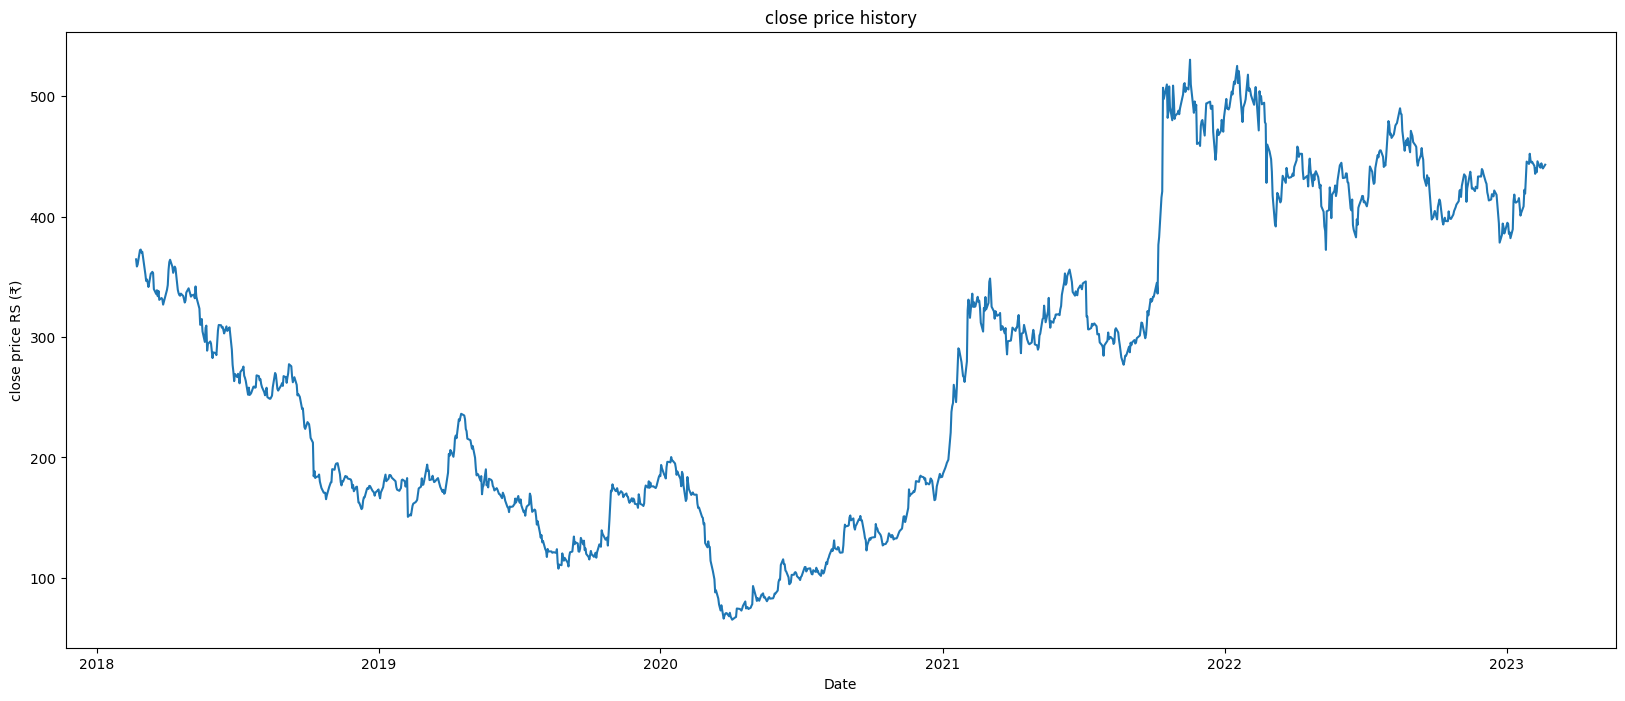

In [ ]:
plt.figure(figsize=(20,8))
plt.title('close price history')
plt.plot(df['CLOSE'])
plt.xlabel('Date')
plt.ylabel('close price RS (₹)')
plt.show()

CREATE A NEW DATAFRAME WITH ONLY THE 'CLOSE'COLUMN

---





 CONVERT THE DATAFRAME TO NUMPY ARRAY

GET THE NUMBER OF ROWS TO TRAIN THE MODEL ON

In [ ]:
data=df.filter(['CLOSE'])
dataset=data.values
training_data_len=math.ceil(len(dataset) * .8)
training_data_len

989

SCALE THE DATA

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)
scaled_data

array([[0.64354092],
       [0.63074106],
       [0.63439818],
       ...,
       [0.80950841],
       [0.80585129],
       [0.81252012]])

CREATE THE TRAINING DATASET

SPLIT THE DATA INTO X_TRAIN AND Y_TRAIN DATASET

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.64354092, 0.63074106, 0.63439818, 0.65989023, 0.66096584,
       0.65526509, 0.65709365, 0.6168656 , 0.60492629, 0.60772286,
       0.60202211, 0.59417013, 0.61804881, 0.61923196, 0.62116806,
       0.61912443, 0.59040547, 0.58169301, 0.58836178, 0.57771322,
       0.58707109, 0.57125953, 0.57448637, 0.57190487, 0.5626546 ,
       0.58911472, 0.59761211, 0.62450251, 0.63870065, 0.64278797,
       0.63031079, 0.6194471 , 0.62493271, 0.63052593, 0.62762175,
       0.58911472, 0.58330644, 0.57975685, 0.5785737 , 0.58233836,
       0.57814343, 0.57276535, 0.56641926, 0.56996877, 0.58427445,
       0.59180376, 0.58244589, 0.57696028, 0.57889637, 0.5805098 ,
       0.5740561 , 0.59513821, 0.57717541, 0.57115193, 0.5556631 ,
       0.52662147, 0.52694415, 0.53694736, 0.5147897 , 0.49607396])]
[0.5214585308150389]

[array([0.64354092, 0.63074106, 0.63439818, 0.65989023, 0.66096584,
       0.65526509, 0.65709365, 0.6168656 , 0.60492629, 0.60772286,
       0.60202211, 0.59417013, 0.618

CONVERT THE X_TRAIN ANG  Y_TRAIN TO NUMPY ARRAYS

In [ ]:
x_train,y_train = np.array(x_train),np.array(y_train)

RESHAPE THE DATA

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(929, 60, 1)

IMPORT THE LIBRARIES REQUIRED FOR LSTM MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

BULID THE LSTM MODEL

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

VIEW THE SUMMARY OF LSTM MODEL

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


COMPILE THE MODEL

In [ ]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

TRAIN THE MODEL

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

929/929 [==============================] - 32s 31ms/step - loss: 0.0036


CREATE THE TESTING DATA SET

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

CONVERT THE DATA TO A NUMPY ARRAY

In [ ]:
x_test = np.array(x_test)

RESHAPE THE DATA

In [ ]:
x_test =np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(247, 60, 1)

GET THE MODELS PREDICTED PRICE VALUES:

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 19ms/step


GET THE ROOT MEAN SQUARED ERROR (RMSE):

In [ ]:
rmse =np.sqrt(np.mean(predictions - y_test)**2)
rmse

26.868713368848056

PLOT THE DATA

<ipython-input-47-0511394a5b89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


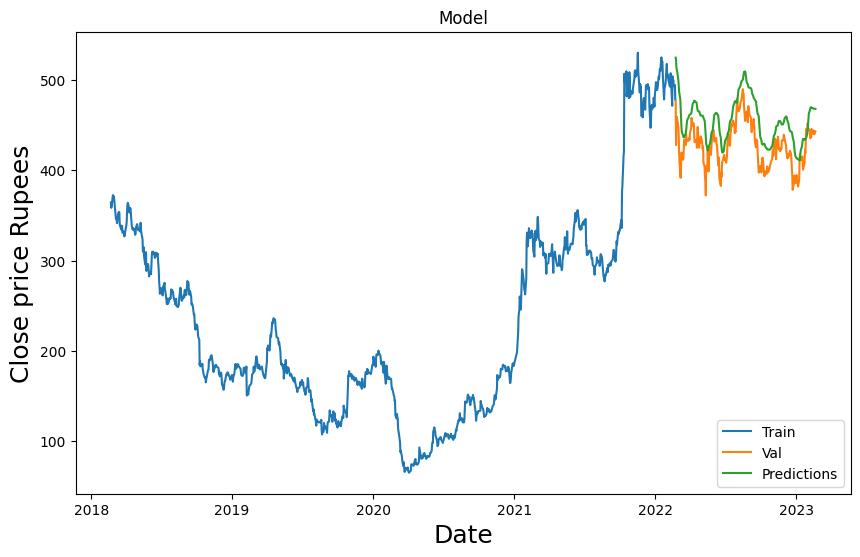

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(10,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price Rupees',fontsize=18)
plt.plot(train['CLOSE'])
plt.plot(valid[['CLOSE','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

SHOW THE VALID AND PREDICTED PRICES


In [ ]:
valid

,CLOSE,Predictions
2022-02-23,477.000000,524.763550
2022-02-24,427.950012,521.844299
2022-02-25,459.750000,513.496155
2022-02-28,454.049988,506.173859
2022-03-02,447.600006,499.494843
...,...,...
2023-02-14,440.549988,468.585999
2023-02-15,444.149994,468.219452
2023-02-16,441.600006,468.226929
2023-02-17,439.899994,468.193939
